In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math

In [2]:
data = pd.read_csv('admission.txt', sep=",", header=None)

In [3]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = np.c_[np.ones(len(data)), data.loc[:,0:1].to_numpy()]
y = data.loc[:,2].to_numpy()

# Définition de la fonction sigmoid (vectorisée)

![title](img/sigmoid.png)

In [5]:
# Fonction sigmoid
sig = np.vectorize(lambda z : 1 / (1 + math.exp(-z)))

In [6]:
sig(0)

array(0.5)

In [7]:
sig(np.random.randint(-10, 10, 3)) # 3 valeurs aléatoires entre -10 et 10

array([9.93307149e-01, 9.82013790e-01, 9.11051194e-04])

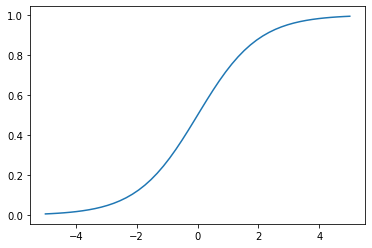

In [8]:
plt.plot(np.linspace(-5, 5), sig(np.linspace(-5, 5)), '-')

# Définition de la fonction de cout J_theta (Log-likelyhood)

![title](img/cout.png)

In [9]:
# On multiplie la valeur au dessu par -1/N

def J_theta(X, y, Theta):
    u = sig(X.dot(Theta))  # u = h_theta(Xi) = sigmoid(X' * theta)
    J = y.transpose().dot(np.log(u)) + (1-y).transpose().dot(np.log(1-u))
    
    return -J/len(y)

In [10]:
J_theta(X, y, np.zeros(3))

0.6931471805599453

# Calcul du gradient 

grad = X' * (sigmoid(X*theta) - y) / N

In [11]:
def gradient(X, y, Theta):
    u = sig(X.dot(Theta))  # u = h_theta(Xi) = sigmoid(X' * theta)
    return (X.transpose().dot((u - y))) / len(y)

In [12]:
gradient(X, y, np.zeros(3))

array([ -0.1       , -12.00921659, -11.26284221])

# Déscente de gradient

![title](img/degr.png)

In [13]:
def gradientDesent(X, y, Theta_0, learning_rate, epoch):
    Theta_s = [Theta_0]
    Theta = Theta_0
    for t in range(epoch):
        g = gradient(X, y, Theta)
        Theta = Theta - learning_rate * g
        Theta_s.append(Theta)
    return Theta_s

In [14]:
T = 100000

In [15]:
Theta_s = gradientDesent(X, y, np.zeros(3), 0.001, T)

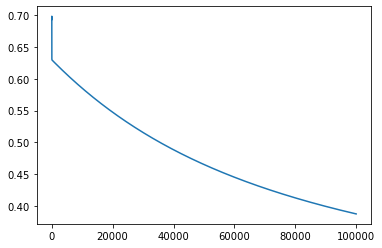

In [16]:
plt.plot(range(T), [J_theta(X, y, Theta_s[i]) for i in range(T)])

In [17]:
Theta_best = Theta_s[T]
Theta_best

array([-4.81180027,  0.04528064,  0.03819149])

In [18]:
def classify(x, Theta_best):
    score = x.transpose().dot(Theta_best)
    if (score >= 0):
        return 1 
    else:
        return 0

In [19]:
y_ = np.array([classify(i, Theta_best) for i in X])
y_

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [20]:
accuracy = sum(y_ == y) / len(y)
accuracy

0.91